# Probleme de clasificare nesupervizata (clustering) <img src="https://upload.wikimedia.org/wikipedia/commons/c/c8/Cluster-2.svg" width="150">

## Obiective
* rezolvarea unei probleme de clustering (metoda bazata pe k-means)
* extragerea de caracteristici din informatiile textuale

## Cuvinte cheie:
* date de antrenare si date de testare 
* atribute/catacteristici ale datelor
* etichete ale datelor
* normalizare date 
* model de clusterizare
* acuratetea clusterizarii

## Aspecte teoretice

Clasificarea nesupervizata, numita si clusterizare, are drept scop invatarea unei modalitati de grupare a datelor pentru care nu au fost oferite in prealabil detalii despre apartententa lor la anumite clase. In loc sa raspunda la un feedback (construit pe baza etichetelor asociate exemplelor de antrenament), clasificarea nesuepervizata identifica asemanari intre date. 

Se doreste impartirea unor exemple neetichetate în submultimi disjuncte (clusteri) astfel incat:
* exemplele din acelasi cluster sunt foarte similare
* exemplele din clusteri diferiti sunt foarte diferite


### Exemple de probleme de clusterizare:
* segmentarea clientilor de pe o anumita piata  
* analize in retele sociale (identificarea unor grupuri cu anumite particularitati)
* compresia imaginilor

<details>
  <summary>Remember the theory behind clustering </summary>
 

### Formalizare problema de clusterizare:

Clusterizarea presupune identificarea unui model de asociere exemplu-eticheta.
Se dau:
* un set de date de train si un set de date de test
* fiecare data (exemplu) se caracterizeaza prin $m$ $atribute$ ($x = (x_1, x_2, ..., x_m)$) (atributele pot fi valori numerice sau valori nenumerice)

Se cere sa se determine o functie (necunoscuta) care realizeaza gruparea datelor de antrenament in mai multe clase
* nr de clase poate fi pre-definit (k) sau necunoscut
* datele dintr-o clasa sunt asemanatoare
* clasa asociata unei date (noi) de test folosind gruparea invatata pe datele de antrenament



### Algoritmi
* k-means <img src="http://shabal.in/visuals/kmeans/random.gif" width="150">


Logica k-means:

1. Se initializeaza $k$ centroizi $\mu_1$, $\mu_2$, ..., $\mu_{k}$. Un centroid $\mu_j$ este un vector cu $m$ valori ($m$ - nr de atribute). Initializarea se poate realiza:
* pur random
* alegand, random, $k$ exemple (din setul de date de antrenament)

2. Se repeta pana la convergenta: 

- Fiecare exemplu $x^i$ din setul de antrenament se asociaza celui mai apropiat centroid (i se asociaza eticheta $c^i$)
$$c^i = \arg\min_{j=1,2,  \ldots, k}{dist(x^i, \mu_j)},$$

unde $dist(a,b)$ este o functie care masoara distanta intre 2 exemple $a$ si $b$ (intre atributele lor).

- Se recalculeaza centroizii prin mutarea lor in media exemplelor asociate fiecaruia

$$ \mu_j = \frac{\sum_{i=1,2, \ldots, N}{1_{c^i=j} x^i}}{\sum_{i=1,2, \ldots, N}{1_{c^i=j}}}$$ 


</details>


## Exemple

### Demo1

#### Problema: Ce fel de mesaje primesti in Inbox? 
Se doreste clusterizarea unor mesaje in doua categorii (spam si ham). Pentru fiecare mesaj se cunoaste textul aferent lui. Să se rezolve problema, implementându-se rutine pentru clusterizare cu k-means a mesajelor.

Proces:
* Se pleaca de la un set de date format din textul mesajelor precum cel din fisierul spam csv [link](data/spam.csv).
* Se imparte setul de date in date de antrenament si in date de test
* Se extrag anumite caracteristici din textul mesajelor folosind diferite reprezentari precum:
    - Bag of Words
    - TF-IDF
    - Word2Vec
* invatare model - se aplica algoritmul k-means pe setul de antrenament si se identifica cei doi centroizi (corespunzatori clusterilor spam si ham, respectiv)
* stabilire rezultate (pt datele de test) - fiecare mesaj din setul de test se asociaza acelui cluster pentru care distanta dintre caracteristicile mesajului si centroid este minima
* calcul metrici de performanta

In [10]:
import csv
import os

#### Pasul 1 - incarcare date

In [11]:
# load some data
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'data', 'spam.csv')

data = []
with open(fileName) as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count == 0:
            dataNames = row
        else:
            data.append(row)
        line_count += 1

inputs = [data[i][0] for i in range(len(data))]
outputs = [data[i][1] for i in range(len(data))]
labelNames = list(set(outputs))

print(inputs[:2])
print(labelNames[:2])

['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...', 'Ok lar... Joking wif u oni...']
['ham', 'spam']


#### Pasul 2 - impartire date (antrenament si test)

In [12]:
# prepare data for training and testing

import numpy as np

np.random.seed(5)
# noSamples = inputs.shape[0]
noSamples = len(inputs)
indexes = [i for i in range(noSamples)]
trainSample = np.random.choice(indexes, int(0.8 * noSamples), replace = False)
testSample = [i for i in indexes  if not i in trainSample]

trainInputs = [inputs[i] for i in trainSample]
trainOutputs = [outputs[i] for i in trainSample]
testInputs = [inputs[i] for i in testSample]
testOutputs = [outputs[i] for i in testSample]

print(trainInputs[:3])

['Probably, want to pick up more?', "No go. No openings for that room 'til after thanksgiving without an upcharge.", "Fuck babe ... I miss you already, you know ? Can't you let me send you some money towards your net ? I need you ... I want you ... I crave you ..."]


#### Pasul 3 - extragere caracteristici

In [13]:
# extract some features from the raw text

# # representation 1: Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

trainFeatures = vectorizer.fit_transform(trainInputs)
testFeatures = vectorizer.transform(testInputs)

# vocabbulary from the train data 
print('vocab: ', vectorizer.get_feature_names_out()[:10])
# extracted features
print('features: ', trainFeatures.toarray()[:3][:10])




vocab:  ['00' '000' '000pes' '008704050406' '0089' '0121' '01223585236'
 '01223585334' '0125698789' '02']
features:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [14]:
# representation 2: tf-idf features - word granularity
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=50)

trainFeatures = vectorizer.fit_transform(trainInputs)
testFeatures = vectorizer.transform(testInputs)

# vocabbulary from the train data 
print('vocab: ', vectorizer.get_feature_names_out()[:10])
# extracted features
print('features: ', trainFeatures.toarray()[:3])


vocab:  ['all' 'and' 'are' 'at' 'be' 'but' 'call' 'can' 'do' 'for']
features:  [[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.48953734 0.87198234
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.3295343  0.         0.
  0.         0.41451322 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.77284681 0.
  0.         0.         0.         0.         0.         0.
  0.         0.34970523 0.         0.         0.

In [17]:
# representation 3: embedded features extracted by a pre-train model (in fact, word2vec pretrained model)

import gensim 

# Load Google's pre-trained Word2Vec 
crtDir =  os.getcwd()
modelPath = os.path.join(crtDir, 'model', 'GoogleNews-vectors-negative300.bin')

word2vecModel300 = gensim.models.KeyedVectors.load_word2vec_format(modelPath, binary=True) 
print(word2vecModel300.most_similar('support'))
print("vec for house: ", word2vecModel300["house"])



[('supporting', 0.6251285076141357), ('suport', 0.6071150302886963), ('suppport', 0.6053199768066406), ('Support', 0.6044272780418396), ('supported', 0.6009396314620972), ('backing', 0.6007589101791382), ('supports', 0.5269277691841125), ('assistance', 0.5207138061523438), ('sup_port', 0.5192490220069885), ('supportive', 0.5110024809837341)]
vec for house:  [ 1.57226562e-01 -7.08007812e-02  5.39550781e-02 -1.89208984e-02
  9.17968750e-02  2.55126953e-02  7.37304688e-02 -5.68847656e-02
  1.79687500e-01  9.27734375e-02  9.03320312e-02 -4.12109375e-01
 -8.30078125e-02 -1.45507812e-01 -2.37304688e-01 -3.68652344e-02
  8.74023438e-02 -2.77099609e-02  1.13677979e-03  8.30078125e-02
  3.57421875e-01 -2.61718750e-01  7.47070312e-02 -8.10546875e-02
 -2.35595703e-02 -1.61132812e-01 -4.78515625e-02  1.85546875e-01
 -3.97949219e-02 -1.58203125e-01 -4.37011719e-02 -1.11328125e-01
 -1.05957031e-01  9.86328125e-02 -8.34960938e-02 -1.27929688e-01
 -1.39648438e-01 -1.86523438e-01 -5.71289062e-02 -1.176

In [20]:
def featureComputation(model, data):
    features = []
    phrases = [ phrase.split() for phrase in data]
    for phrase in phrases:
        # compute the embeddings of all the words from a phrase (words of more than 2 characters) known by the model
        vectors = [model[word] for word in phrase if (len(word) > 2) and (word in model.vocab.keys())]
        if len(vectors) == 0:
            result = [0.0] * model.vector_size
        else:
            result = np.sum(vectors, axis=0) / len(vectors)
        features.append(result)
    return features

trainFeatures = featureComputation(word2vecModel300, trainInputs)
testFeatures = featureComputation(word2vecModel300, testInputs)



TypeError: 'list' object is not callable

#### Pasul 4 - antrenare model de invatare nesupervizata (clustering)

In [ ]:
# unsupervised classification ( = clustering) of data

from sklearn.cluster import KMeans

unsupervisedClassifier = KMeans(n_clusters=2, random_state=0)
unsupervisedClassifier.fit(trainFeatures)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

#### Pasul 5 - testare model

In [ ]:
computedTestIndexes = unsupervisedClassifier.predict(testFeatures)
computedTestOutputs = [labelNames[value] for value in computedTestIndexes]


#### Pasul 6 - calcul metrici de performanta

In [ ]:
from sklearn.metrics import accuracy_score

# just supposing that we have the true labels
print("acc: ", accuracy_score(testOutputs, computedTestOutputs))


acc:  0.8582959641255605


## Tema

 ### Problema: Clasificarea textelor pe baza sentimentelor
 
 **Retea sociala: ce fel de mesaje ai postat?**
Mai tii minte ca tocmai ti-ai inceput munca ca si software developer la Facebook si ca faci parte din echipa care se ocupa cu partea de continut a platformei? 

Utilizatorii sunt foarte incantati de noul algoritm de detectie a filtrelor in poze, asadar poti sa te ocupi de o noua functionalitate care ar face platforma mai atractiva. Utilizatorii posteaza o gama larga de mesaje, iar in feed-urile lor apar de multe ori prea multe mesaje negative si prea putine pozitive. Facebook incearca o noua functionalitate prin care sa detecteze sentimentele dintr-un mesaj si sa filtreze feed-urile utilizatorilor.

Task-ul tau este sa implementezi un algoritm care poate recunoaste sentimentele dintr-un text (pozitiv, negativ, ura, rasism, etc.)

Team leaderul echipei de ML iti propune urmatorul plan de lucru 
- devoltarea, antrenarea si testarea unui algoritm de tip k-means folosind data de tip numeric (de ex datele cu irisi) 
- devoltarea, antrenarea si testarea unui algoritm de tip k-means folosind data de tip text
    - Considerarea unei baze cu texte etichetate cu emotii (de ex. textele din data/review_mixed.csv sau https://github.com/sarnthil/unify-emotion-datasets/tree/master/datasets)
    - Extragerea de caracteristici din texte folosind diferite reprezentari precum:
        - Bag of Words
        - TF-IDF
        - Word2Vec
        - N-grams, etc.
    - pe baza caracteristicilor extrase, clasificarea textelor si etichetarea lor cu emotii folosind
        - un algoritm de invatare supervizat (folosind etichetele pt emotiile asociate fiecarui text)
        - un algoritm de invatare nesupervizat bazat pe k-means (fara a folosi etichetele pt emotiile asociate fiecarui text)
        - un algoritm hibrid care combina tehncile de invare cu reguli ajutatoare, de ex prin folosirea unor reguli care verifica/numara aparitiile unor cuvinte - polarized words - (e.g. negative words such as bad, worst, ugly, etc and positive words such as good, best, beautiful, etc.)


In [1]:
# import classic libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import os

In [2]:
# load the iris dataset
iris = sns.load_dataset('iris')

In [3]:
# KMeans clustering
from sklearn.cluster import KMeans


In [4]:
# kmeans on iris
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])


/mnt/e/codinganddev/pythons/aiMaterie/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [5]:
# accuracy
from sklearn.metrics import accuracy_score

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


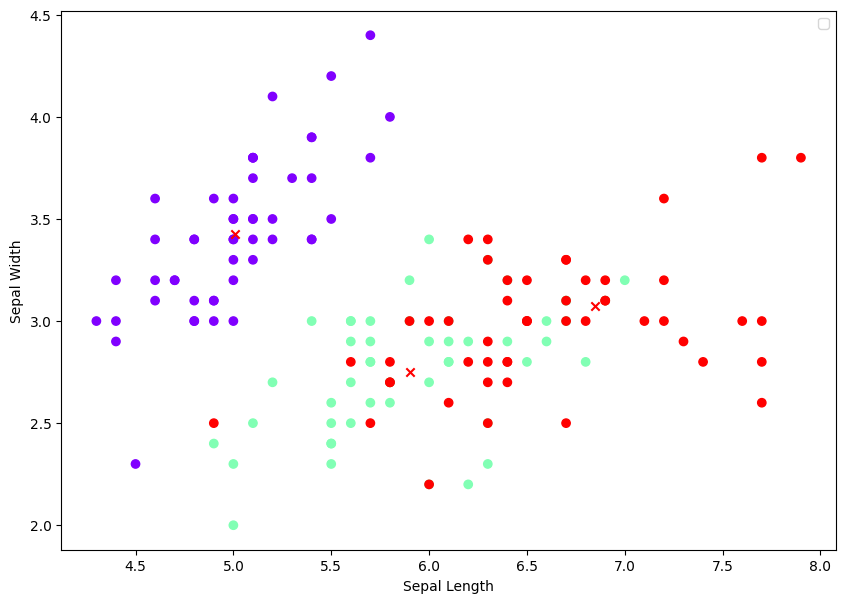

In [6]:
# plot the clusters
plt.figure(figsize=(10, 7))
# plot true labels of iris dataset
plt.scatter(iris['sepal_length'], iris['sepal_width'], c=iris['species'].astype('category').cat.codes, cmap='rainbow')
# legend
plt.legend()

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.show()

plt.show()


In [7]:
# scikit bag of words
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# use countVectorizer
vectorizer = CountVectorizer()

In [9]:
# user pandas to import reviews_mixed.csv
crtDir =  os.getcwd()
fileName = os.path.join(crtDir, 'data', 'reviews_mixed.csv')
data = pd.read_csv(fileName)

In [10]:
corpus = data['Text'].to_list()

In [11]:
X = vectorizer.fit(corpus)

In [12]:
X.vocabulary_

{'the': 548,
 'rooms': 458,
 'are': 44,
 'extremely': 203,
 'small': 496,
 'practically': 419,
 'only': 387,
 'bed': 64,
 'room': 457,
 'safe': 463,
 'did': 157,
 'not': 378,
 'work': 639,
 'mattress': 345,
 'very': 608,
 'comfortable': 117,
 'uncomfortable': 593,
 'thin': 553,
 'with': 638,
 'plastic': 411,
 'cover': 138,
 'that': 547,
 'rustles': 462,
 'every': 194,
 'time': 565,
 'you': 647,
 'move': 360,
 'no': 375,
 'bathroom': 59,
 'in': 286,
 'was': 619,
 'soooo': 508,
 'comfy': 118,
 'someone': 506,
 'must': 362,
 'have': 263,
 'been': 68,
 'smoking': 501,
 'next': 372,
 'door': 167,
 'is': 293,
 'spacious': 515,
 'quiet': 435,
 'and': 37,
 'for': 225,
 'people': 404,
 'bedroom': 66,
 'sofa': 504,
 'bit': 74,
 'unconfortable': 594,
 'lights': 319,
 'common': 120,
 'were': 626,
 'too': 573,
 'dim': 161,
 'air': 24,
 'conditioning': 124,
 'working': 641,
 'fine': 217,
 'so': 503,
 'if': 283,
 're': 438,
 'type': 589,
 'likes': 322,
 'to': 569,
 'let': 314,
 'water': 621,
 'run': 

In [13]:
from gensim.models import KeyedVectors


In [14]:
model = KeyedVectors.load_word2vec_format('model/GoogleNews-vectors-negative300.bin', binary=True)


In [33]:
vector = model['word']
print(vector.shape)

NameError: name 'model' is not defined

In [13]:
# logistic regression
from sklearn.linear_model import LogisticRegression

In [14]:
regressor = LogisticRegression()

In [15]:
sentences = corpus
labels = data['Sentiment'].to_list()


In [16]:
X = vectorizer.fit_transform(sentences)

In [17]:
regressor.fit(X, labels)

LogisticRegression()

In [18]:
y_pred = regressor.predict(X)
accuracy = accuracy_score(labels, y_pred)
print(accuracy)

0.9806763285024155


In [19]:
# extract N-Gram from sentences
from nltk import ngrams


In [20]:
# use ngram on sentences
sentence = "I love to play football"
n = 2
bigrams = ngrams(sentence.split(), n)
for grams in bigrams:
    print(grams)

('I', 'love')
('love', 'to')
('to', 'play')
('play', 'football')


We've done supervised emotion labelling via logistic regressor, now let's cluster and do unsupervised

In [21]:
# use KMeans on X
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X)

/mnt/e/codinganddev/pythons/aiMaterie/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2, random_state=0)

In [22]:
# Assign clusters to the data
clusters = kmeans.predict(X)

In [23]:
# print labels and clusters
print(labels)
print(clusters)
# consider negative as 1 and positive as 0 in labels
labels2 = [1 if label == 'negative' else 0 for label in labels]
# calculate accuracy
accuracy = accuracy_score(labels2, clusters)
print(accuracy)

['negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'positive', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'negative', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'negative', 'negative', 'negative', 'positive', 'negative', 'positive', 'negative', 'positive', 'positive', 'ne

For the hybrid approach, use the label assigned by clustering and append it into the training data for the logistic regressor

In [24]:
# Take the kmeans label for each example and append it to the training data X
X = vectorizer.fit_transform(corpus)
X = X.toarray()
X = np.append(X, np.array([clusters]).T, axis=1)


In [25]:
# use logistic regression on X
regressor = LogisticRegression()
regressor.fit(X, labels)

LogisticRegression()

In [26]:
# accuracy
y_pred = regressor.predict(X)
accuracy = accuracy_score(labels, y_pred)
print(accuracy)

0.9806763285024155


In [29]:
# take 1 sentence and show the prediction vs real label
sentence = sentences[0]
sentence = vectorizer.transform([sentence])
sentence = sentence.toarray()
sentence = np.append(sentence, np.array([[0]]), axis=1)
prediction = regressor.predict(sentence)


In [32]:
# prediction vs real label
print(sentences[0])
print(prediction)
print(labels[0])

The rooms are extremely small, practically only a bed.
['negative']
negative
